# Author: Kumar R.

# XGBoost

### Problem Statement:
In this assignment we are going to predict whether a person makes over 
50K per year or not from classic adult dataset using XGBoost. The 
description of the dataset is as follows:

Extraction was done by Barry Becker from the 1994 Census 
database. A set of reasonably clean records was extracted using the 
following conditions: ((AAGE>16) && (AGI>100) && 
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, 
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, 
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, 
Doctorate, 5th-6th, Preschool.

education-num: continuous.
    
marital-status: Married-civ-spouse, Divorced, Never-married, 
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, 
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, 
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, 
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, 
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, 
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Net

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the training and testing dataset
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [3]:
#column names of the dataset
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [4]:
#Asssign the column names
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
#Concatination of both training and testing datset 
data = pd.concat([train_set,test_set])

# EDA (Exploratory Data Analysis)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [7]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#Check if there are any missing values in all the columns
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [9]:
data.replace(' ?', np.nan, inplace=True)

In [10]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

## AGE

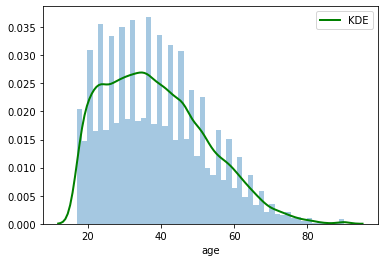

In [11]:
sns.distplot(data['age'],kde_kws={"color": "g", "lw": 2, "label": "KDE"})

In [12]:
#mean of the age column
print("Mean of the age: ",round(data['age'].mean()))

Mean of the age:  39


### Work_CLass

In [13]:
data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [14]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
#Replacing ' Without-pay' as ' Never-worked'
data = data.replace(' Without-pay',' Never-worked')

In [16]:
data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [17]:
#Fill nan with '0' for meantime (can also fill with the mode of the column by analysisng other columns too)
data['workclass'].fillna('0', inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

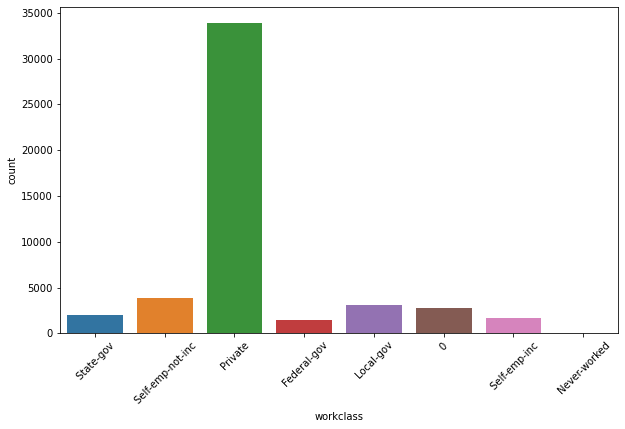

In [18]:
#Count plot
plt.figure(figsize=(10,6))
sns.countplot('workclass', data=data)
plt.xticks(rotation=45)

### fnlwgt

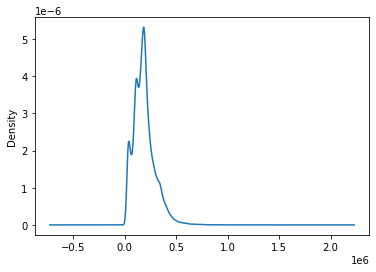

In [19]:
data['fnlwgt'].plot(kind='kde')

In [20]:
#Check if there are any -ve values as it deviates form the domine knowledge.
def check(col):
    if col<0:
        return True

In [21]:
data['fnlwgt'].apply(check).any()

False

In [22]:
data['fnlwgt'].apply(check).sum()

0

In [23]:
#Reducing the magnitude
data['fnlwgt'] = data['fnlwgt'].apply(lambda x: np.log1p(x))

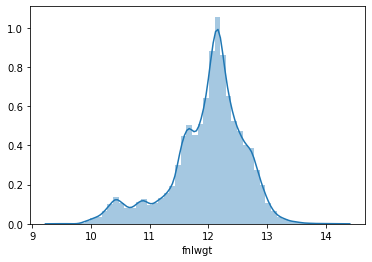

In [24]:
sns.distplot(data['fnlwgt'])

### education

In [25]:
#Values and its count
data['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [26]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [27]:
#Function to replace classes of school and pre_university
def edu(column):
    if column in [' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',]:
        return ' School'
    elif column in [' 11th',' 12th']:
        return ' Pre_uni'
    else:
        return column

In [28]:
#Apply the function on education column
data['education'] = data['education'].apply(edu)

In [29]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' Pre_uni', ' Masters', ' School',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school', ' Preschool'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

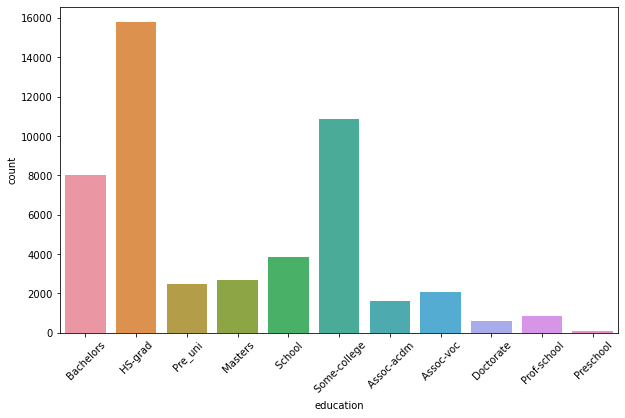

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data['education'])
plt.xticks(rotation=45)

### wage_class

In [31]:
data['wage_class'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: wage_class, dtype: int64

In [32]:
#Get the unique values
data['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [33]:
#Replace it with 0 and 1
data = data.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [34]:
count =  data['wage_class'].value_counts()
count

0    37155
1    11687
Name: wage_class, dtype: int64

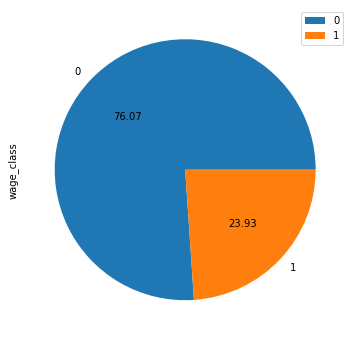

In [35]:
#Viisualization of the values
plt.figure(figsize=(6,6))
count.plot(kind='pie', autopct='%.2f' )
plt.legend()

76% of the people belongs to the wage_class less than 50k per year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

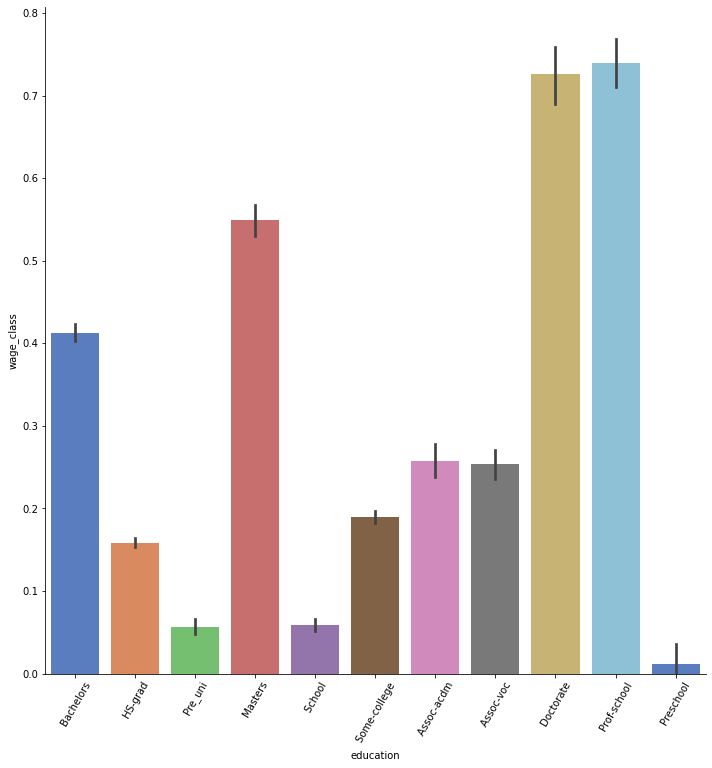

In [36]:
sns.catplot(x='education',y='wage_class',data=data,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

### education_num

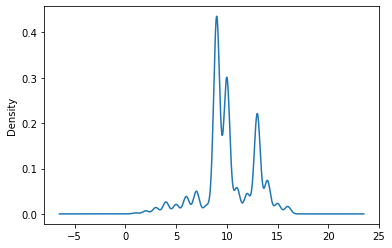

In [37]:
data['education_num'].plot(kind='kde')

### marital_status

In [38]:
data['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [39]:
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [40]:
#Replacement
data['marital_status'].replace(' Married-civ-spouse',' Married-AF-spouse', inplace=True)

In [41]:
count_mar = data['marital_status'].value_counts()
count_mar

 Married-AF-spouse        22416
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'Percentage of people with relationship categories')

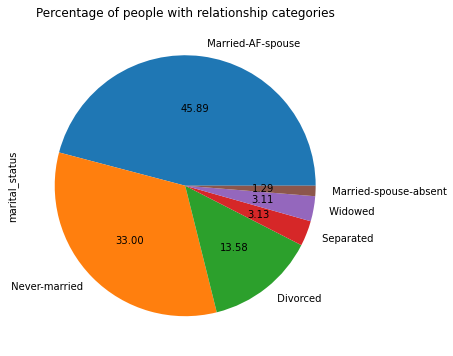

In [42]:
plt.figure(figsize=(6,6))
count_mar.plot(kind='pie', autopct='%.2f')
plt.title('Percentage of people with relationship categories')

### occupation

In [43]:
data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [44]:
data['occupation'].isnull().sum()

2809

In [45]:
#Filling the missing values with '0'.
data['occupation'].fillna('0', inplace=True)

In [46]:
data['occupation'].isnull().any()

False

In [47]:
data['occupation'].replace(' Armed-Forces','0',inplace=True)

In [48]:
data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2824
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

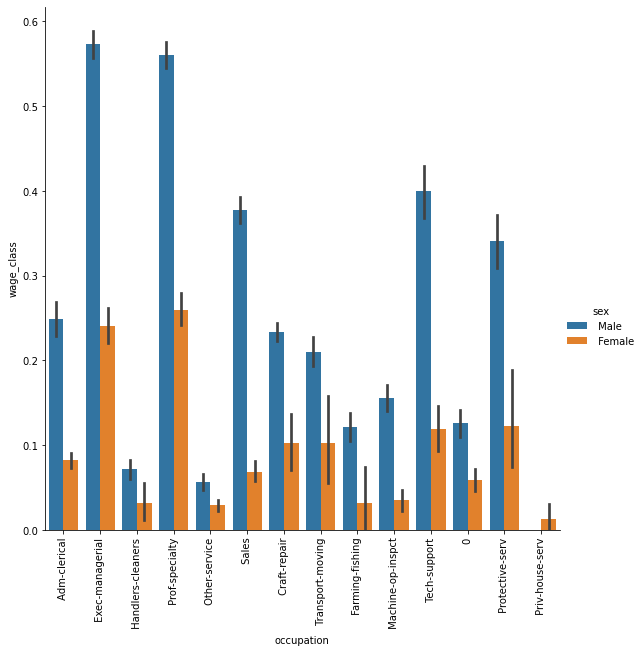

In [49]:
sns.catplot(x='occupation',y='wage_class',data=data, kind='bar',height=8, hue='sex')
plt.xticks(rotation=90)

### relationship

In [52]:
value_rel = data['relationship'].value_counts()
value_rel

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

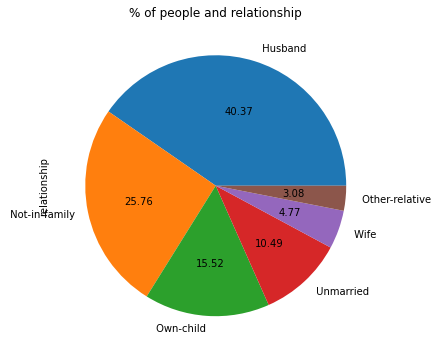

In [53]:
plt.figure(figsize=(6,6))
value_rel.plot(kind='pie',autopct='%.2f')
plt.title("% of people and relationship")
plt.show()

In [54]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [55]:
#Function to replace countries into their continents
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [56]:
#Apply the native function on native_country column
data['native_country'] = data['native_country'].apply(native)

In [57]:
data['native_country'].fillna('0', inplace=True)

In [58]:
native = data['native_country'].value_counts()
native

North_America      44014
South_America       1351
Central_America      945
Asian                895
0                    857
EU                   780
Name: native_country, dtype: int64

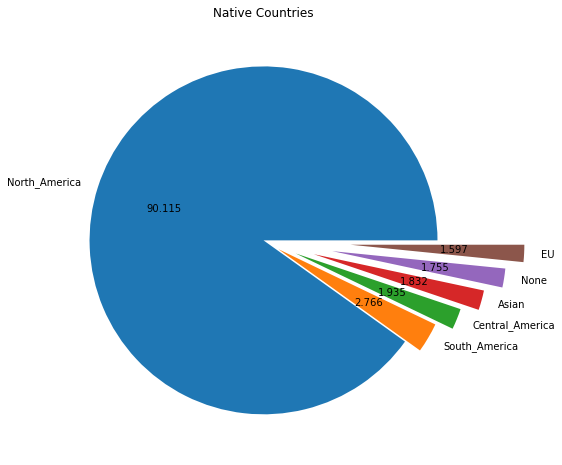

In [59]:
#Visualization
plt.figure(figsize=(8,8))
explod = (0,0.1,0.2,0.3,0.4,0.5)
label = ['North_America','South_America','Central_America','Asian','None','EU']
plt.pie(native,
       explode=explod,
       labels=label,
       autopct='%.3f')
plt.title("Native Countries")
plt.show()

### capital_gain

In [60]:
#Check if any -ve values in capital_gain
data['capital_gain'].apply(check).any(), data['capital_gain'].apply(check).sum()

(False, 0)

## Correlation test

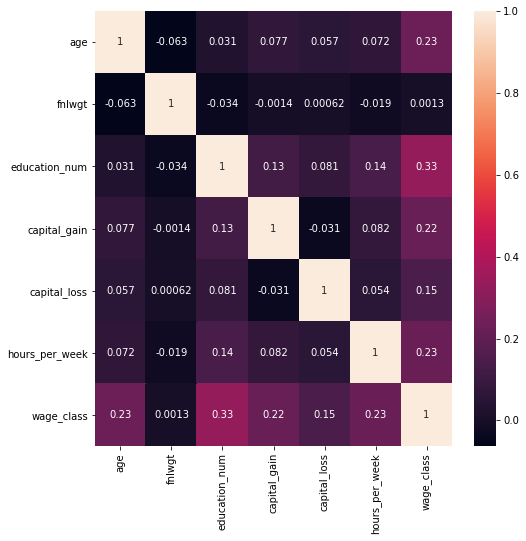

In [61]:
#Correlation test
cor = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)

Since the column 'fnlwgt' is very less correated with the label,, I'm dropping the column

In [62]:
data = data.drop('fnlwgt',axis=1)

# Model Creation

In [63]:
#Seerate feature and label from the dataset
feature = data.iloc[:,:-1].values
label = data.iloc[:,13].values

In [64]:
#Convert the categorial columns into numeric

#Label Encoder
from sklearn.preprocessing import LabelEncoder
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_native = LabelEncoder()

feature[:,1] = le_workclass.fit_transform(feature[:,1])
feature[:,2] = le_education.fit_transform(feature[:,2])
feature[:,4] = le_marital.fit_transform(feature[:,4])
feature[:,5] = le_occupation.fit_transform(feature[:,5])
feature[:,6] = le_relationship.fit_transform(feature[:,6])
feature[:,7] = le_race.fit_transform(feature[:,7])
feature[:,8] = le_sex.fit_transform(feature[:,8])
feature[:,12] = le_native.fit_transform(feature[:,12])

In [65]:
feature[:10,1]

array([6, 5, 3, 3, 3, 3, 3, 5, 3, 3], dtype=object)

In [66]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe_feature = ohe.fit_transform(feature[:,(1,2,4,5,6,7,8,12)])
print(ohe_feature.shape)
ohe_feature

(48842, 58)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [67]:
#Concatination of OneHotEncoded features and rest of the features 
final_feature = np.concatenate((ohe_feature,feature[:,[0,3,9,10,11]]), axis=1)

In [68]:
final_feature.shape

(48842, 63)

In [69]:
final_feature

array([[0.0, 0.0, 0.0, ..., 2174, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 13],
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 50],
       [0.0, 0.0, 0.0, ..., 5455, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 60]], dtype=object)

In [142]:
'''from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder(sparse=False)
new_feature = ohe_2.fit_transform(try_feature[:,(1,2,4,5,6,7,8,12)])
new_feature

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

The above code(OneHotEncoder) alone can give the output we required.

In [70]:
#Train Test Split
from sklearn.model_selection import train_test_split
for i in range(50):
    x_train,x_test,y_train,y_test = train_test_split(final_feature,label, test_size=0.2,random_state=i)
    
    #Model training
    from xgboost import XGBRFClassifier
    model_1 = XGBRFClassifier()
    model_1.fit(x_train,y_train)
    
    train_score = model_1.score(x_train,y_train)
    test_score = model_1.score(x_test,y_test)
    
    if test_score>train_score:
        print(f"test score: {test_score}, train score: {train_score}, RS: {i}")

test score: 0.8622172177295526, train score: 0.8575230977913137, RS: 0
test score: 0.8599651960282526, train score: 0.856755304174238, RS: 5
test score: 0.8605793837649708, train score: 0.856089883039439, RS: 6
test score: 0.8596581021598936, train score: 0.8571903872239142, RS: 9
test score: 0.8582249974408844, train score: 0.8582141120466819, RS: 17
test score: 0.8616030299928344, train score: 0.8569600491387915, RS: 19
test score: 0.8585320913092436, train score: 0.8575230977913137, RS: 24
test score: 0.8586344559320299, train score: 0.8574719115501753, RS: 25
test score: 0.858941549800389, train score: 0.858239705167251, RS: 30
test score: 0.8592486436687481, train score: 0.857830215238144, RS: 32
test score: 0.8607841130105436, train score: 0.856755304174238, RS: 37
test score: 0.8599651960282526, train score: 0.8561154761600082, RS: 41


# Hyper Parameter Tuning

In [71]:
parameters = [{'learning_rate':[0.1,0.5,1],
               'n_estimators':[5,10,15],
               'max_depth':[3,5,10]}]

In [73]:
from sklearn.model_selection import GridSearchCV
grid_sc = GridSearchCV(model_1,
                       param_grid=parameters,
                       scoring='accuracy',
                       n_jobs=3,
                       cv=10,
                       verbose=3)

In [74]:
grid_sc.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   33.3s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done 270 out of 270 | elapsed:  7.1min finished


GridSearchCV(cv=10,
             estimator=XGBRFClassifier(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bytree=1,
                                       gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       max_delta_step=0, max_depth=6,
                                       min_child_weight=1, missing=nan,
                                       monotone_constraints='()',
                                       n_estimators=100, n_jobs=0,
                                       num_parallel_tree=100,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       scale_pos_weight=1, tree_method='exact',
                                       validate_parameters=1, verbosity=None),
      

In [75]:
grid_sc.best_score_

0.8634095064392469

In [76]:
grid_sc.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}

In [77]:
from sklearn.model_selection import train_test_split
for i in range(50):
    x_train,x_test,y_train,y_test = train_test_split(final_feature,label, test_size=0.2,random_state=i)
    
    from xgboost import XGBRFClassifier
    model_1 = XGBRFClassifier(learning_rate=0.1,
                              max_depth=10,
                              n_estimators=5)
    model_1.fit(x_train,y_train)
    
    train_score = model_1.score(x_train,y_train)
    test_score = model_1.score(x_test,y_test)
    
    if test_score>train_score:
        print(f"test score: {test_score}, train score: {train_score}, RS: {i}")

test score: 0.8679496366055891, train score: 0.867888311621836, RS: 37


## Cross validation test

In [78]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator=model_1,X=final_feature,y=label,cv=5)
print("Minimum score: ",np.min(cv_score))
print("Average score: ",np.average(cv_score))
print("Maximum score: ",np.max(cv_score))

Minimum score:  0.8583273620636708
Average score:  0.8620041530190983
Maximum score:  0.8662981162981163


In [79]:
#Final model training
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(final_feature,label, test_size=0.2,random_state=37)
    
from xgboost import XGBRFClassifier
model_1 = XGBRFClassifier(learning_rate=0.1,
                          max_depth=10,
                          n_estimators=5)
model_1.fit(x_train,y_train)
    
train_score = model_1.score(x_train,y_train)
test_score = model_1.score(x_test,y_test)
print(f"test score: {test_score}, train score: {train_score}")

test score: 0.8679496366055891, train score: 0.867888311621836


# Prediction and Testing

In [80]:
#Prediction
predictor = model_1.predict(final_feature)

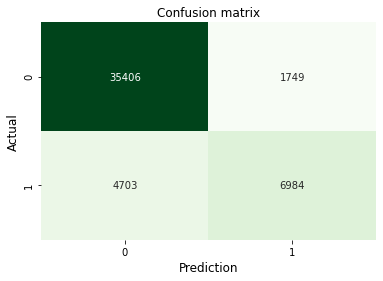

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(label, predictor)
ax = plt.subplot()
sns.heatmap(cm,cbar=False,annot=True,cmap='Greens',fmt='g',ax=ax)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.title('Confusion matrix')
plt.show()

In [82]:
report = classification_report(label, predictor)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     37155
           1       0.80      0.60      0.68     11687

    accuracy                           0.87     48842
   macro avg       0.84      0.78      0.80     48842
weighted avg       0.86      0.87      0.86     48842



## AUC and ROC Curve

In [83]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(label,predictor)
print(f"Area Under the Curve: {auc}")

Area Under the Curve: 0.775256995141647


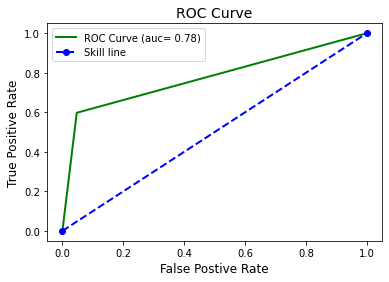

In [84]:
#Visualisation
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(label, predictor)
plt.plot(fpr,tpr,'g',linewidth=2,label='ROC Curve (auc= %0.2f)' %auc)
plt.plot([0,1],[0,1],'bo--',linewidth=2,label='Skill line')
plt.xlabel('False Postive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend()
plt.show()

In [87]:
import pickle
pickle.dump(model_1,        open('XGBoost.model','wb'))
pickle.dump(le_workclass,   open("le_workclass",'wb'))
pickle.dump(le_education,   open("le_education",'wb'))
pickle.dump(le_marital,     open("le_workclass",'wb'))
pickle.dump(le_occupation,  open("le_workclass",'wb'))
pickle.dump(le_relationship,open("le_workclass",'wb'))
pickle.dump(le_race,        open("le_workclass",'wb'))
pickle.dump(le_sex,         open("le_workclass",'wb'))
pickle.dump(le_native ,     open("le_workclass",'wb'))
pickle.dump(ohe,            open("OneHotEncoder",'wb'))

# Done !